# Model Building

## Attaching Resources

### Importing Necessary Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor ,RandomForestRegressor,GradientBoostingRegressor,VotingRegressor,StackingRegressor, BaggingRegressor
import pickle

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

### Adding Dataset

In [2]:
xtrain = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Wild-Blueberry-Yield/Working/Feature%20Engineering%20%26%20Feature%20Extraction/xtrain.csv')
ytrain = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Wild-Blueberry-Yield/Working/Feature%20Engineering%20%26%20Feature%20Extraction/ytrain.csv')

xtrain

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,-3.547236,1.721761,0.783004,-0.360791,-1.231114,0.822210,1.061987,0.061289
1,-3.491837,1.403319,0.317956,0.340913,-0.286576,0.931790,-0.094618,0.173550
2,1.158622,-0.929251,-1.056162,-1.541264,-0.608161,0.093138,0.262078,-0.067457
3,-1.063520,-1.406425,-1.349643,-1.239193,-0.427389,0.982451,0.674583,0.009827
4,-1.040946,-0.903774,1.199010,-1.458922,0.074867,1.750173,-0.331411,-0.050655
...,...,...,...,...,...,...,...,...
15100,-1.019800,-1.979337,-1.493230,0.281778,-0.032021,0.642453,-0.394220,0.126622
15101,0.623028,3.122603,-3.000952,0.522615,0.104610,-1.013185,-0.543093,0.256200
15102,-1.535171,2.574048,0.222870,-0.855221,0.469169,-0.250566,-1.519251,0.041214
15103,-3.355761,0.236572,1.047496,-0.956048,-0.363547,0.992223,-0.138939,0.039688


In [3]:
xtest = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Wild-Blueberry-Yield/Working/Feature%20Engineering%20%26%20Feature%20Extraction/xtest.csv')
ytest = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Wild-Blueberry-Yield/Working/Feature%20Engineering%20%26%20Feature%20Extraction/ytest.csv')

xtest

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,-0.792740,2.631812,1.041241,-2.456277,-0.124576,0.171591,-0.823259,-0.353735
1,-3.354009,-1.000444,0.447770,0.602996,-2.075589,-1.061670,0.311317,1.223598
2,-1.218033,-1.865566,-1.093504,0.223988,-0.918474,0.293186,-0.022155,0.267013
3,-0.883013,1.005650,1.362120,0.163499,1.420322,-0.972292,0.282115,0.242936
4,-2.970749,4.084010,2.596862,-1.414646,0.208905,0.743810,-1.186868,-0.907490
...,...,...,...,...,...,...,...,...
10189,-0.942593,1.443672,0.614865,-2.409930,0.133344,0.733941,-1.178000,-0.672553
10190,1.296454,0.024872,0.512759,1.001498,-0.378405,-0.195955,0.420847,-0.957130
10191,1.168939,-1.014786,0.709093,0.146537,1.388136,0.255838,-1.151011,0.434752
10192,-3.049842,2.756595,-1.198065,-1.393759,-0.257365,-0.024401,0.817477,0.427653


## Preparing Model From The Dataset

### Picking Model Lowest Training And Testing Difference

In [4]:
def predict(model):
    print('Creating Model With ' + str(model))
    model.fit(xtrain,ytrain)
    train_pred = model.predict(xtrain)
    print('Training Accuracy of are Model is : ' + str(r2_score(ytrain, train_pred)))

    test_pred = model.predict(xtest)
    print('Training Accuracy of are Model is : ' + str(r2_score(ytest, test_pred)))

    print('Mean Absolute Error of are Model is : ' + str(mean_absolute_error(ytest, test_pred)))
    print('\n')

In [5]:
models = [KNeighborsRegressor(), DecisionTreeRegressor(),  (), BaggingRegressor(DecisionTreeRegressor()), BaggingRegressor(KNeighborsRegressor())]

for i in range(len(models)):
    predict(models[i])

Creating Model With KNeighborsRegressor()
Training Accuracy of are Model is : 0.835318340297678
Training Accuracy of are Model is : -3.960566067900093e+29
Mean Absolute Error of are Model is : 948.1738247731998


Creating Model With DecisionTreeRegressor()
Training Accuracy of are Model is : 0.9999888373056944
Training Accuracy of are Model is : -6.733835840050327e+29
Mean Absolute Error of are Model is : 1208.3203818206787


Creating Model With RandomForestRegressor()
Training Accuracy of are Model is : 0.9677241556077482
Training Accuracy of are Model is : -3.721638834306961e+29
Mean Absolute Error of are Model is : 918.9711388939733


Creating Model With BaggingRegressor(base_estimator=DecisionTreeRegressor())
Training Accuracy of are Model is : 0.9561246495468894
Training Accuracy of are Model is : -3.831028777323629e+29
Mean Absolute Error of are Model is : 929.1006945936009


Creating Model With BaggingRegressor(base_estimator=KNeighborsRegressor())
Training Accuracy of are Model

### Performing Hyperparameter Tuning

In [6]:
params = {
    'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
    'max_depth' : [1,2,3,4,5,6],
    'min_samples_split' : [4,6,8,10,12],
    'max_leaf_nodes' : [8,10,12,14,16,18],
    'min_samples_leaf' : [1,2,3,4,5]
}

In [ ]:
grid = GridSearchCV(DecisionTreeRegressor(),param_grid=params, cv =2, verbose=2, n_jobs = 3)

grid.fit(xtrain,ytrain)

Fitting 2 folds for each of 2700 candidates, totalling 5400 fits
[CV] END criterion=squared_error, max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=8; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_leaf_nodes=8, min_samples_leaf=1, min_samples_split=12; total time=   0.0s
[CV] END criterion=squared_error, max_depth=1, max_leaf_n

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_jobs=3,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [8, 10, 12, 14, 16, 18],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 6, 8, 10, 12]},
             verbose=2)

In [ ]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_leaf_nodes': 18,
 'min_samples_leaf': 1,
 'min_samples_split': 8}

In [ ]:
predict(DecisionTreeRegressor(criterion = 'squared_error', max_depth = 5, max_leaf_nodes = 18, min_samples_leaf = 1, min_samples_split = 8))

Creating Model With DecisionTreeRegressor(max_depth=5, max_leaf_nodes=18, min_samples_split=8)
Training Accuracy of are Model is : 0.7300156078262814
Training Accuracy of are Model is : -3.5674894287239136e+29
Mean Absolute Error of are Model is : 901.5201570753882




#### Tuning Decision Tree Classifier With Bagging Classifier

In [5]:
predict(BaggingRegressor(DecisionTreeRegressor(criterion = 'squared_error', max_depth = 5, max_leaf_nodes = 18, min_samples_leaf = 1, min_samples_split = 8)))

Creating Model With BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5,
                                                      max_leaf_nodes=18,
                                                      min_samples_split=8))
Training Accuracy of are Model is : 0.746454763775763
Training Accuracy of are Model is : -3.602694948425261e+29
Mean Absolute Error of are Model is : 915.599990009636




#### Tuning Gradient Boosting Classifier

In [5]:
predict(GradientBoostingRegressor())

Creating Model With GradientBoostingRegressor()
Training Accuracy of are Model is : 0.8096682634412466
Training Accuracy of are Model is : -3.479311159150872e+29
Mean Absolute Error of are Model is : 896.612721840976




In [6]:
params = {
    'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'criterion' : ['friedman_mse', 'squared_error'],
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'n_estimators' : [1,2,3,4,5]
    }

In [7]:
grid = GridSearchCV(GradientBoostingRegressor(),param_grid=params, cv=3,verbose=2,n_jobs=-1)

In [8]:
grid.fit(xtrain,ytrain)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 2, 3, 4, 5]},
             verbose=2)

In [9]:
grid.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.5,
 'loss': 'huber',
 'max_features': 'auto',
 'n_estimators': 5}

In [10]:
predict(GradientBoostingRegressor(criterion = 'friedman_mse', learning_rate = 0.5, loss = 'huber', max_features = 'auto', n_estimators = 5))

Creating Model With GradientBoostingRegressor(learning_rate=0.5, loss='huber', max_features='auto',
                          n_estimators=5)
Training Accuracy of are Model is : 0.7586912408688639
Training Accuracy of are Model is : -3.115456375098378e+29
Mean Absolute Error of are Model is : 856.8451870677442




#### Tuning Random Forest Classifier With Bagging Classifier

In [11]:
predict(BaggingRegressor(RandomForestRegressor()))

Creating Model With BaggingRegressor(base_estimator=RandomForestRegressor())
Training Accuracy of are Model is : 0.9183580240586018
Training Accuracy of are Model is : -3.643922515104686e+29
Mean Absolute Error of are Model is : 906.9515733137472




In [6]:
params = {  'bootstrap': [True, False],
            'max_depth': [10, 20, 30, 40, 50],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [200, 400, 600, 800, 1000]
    }

In [8]:
rf = RandomizedSearchCV(RandomForestRegressor(), param_distributions = params, cv = 3, verbose=2, n_jobs = -1)

rf.fit(xtrain,ytrain)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   verbose=2)

In [10]:
rf.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

In [12]:
predict(BaggingRegressor(RandomForestRegressor(n_estimators = 600, min_samples_split = 5, min_samples_leaf = 4, max_features = 'auto', max_depth = 30, bootstrap = True)))

Creating Model With BaggingRegressor(base_estimator=RandomForestRegressor(max_depth=30,
                                                      min_samples_leaf=4,
                                                      min_samples_split=5,
                                                      n_estimators=600))
Training Accuracy of are Model is : 0.8696184298884481
Training Accuracy of are Model is : -3.7179536207369494e+29
Mean Absolute Error of are Model is : 914.8698122140755




#### Tuning Logistic Regression With AdaBoost Classifier

In [5]:
predict(AdaBoostRegressor(KNeighborsRegressor()))

Creating Model With AdaBoostRegressor(base_estimator=KNeighborsRegressor())
Training Accuracy of are Model is : 0.9127487554491086
Training Accuracy of are Model is : -4.622035938342725e+29
Mean Absolute Error of are Model is : 1008.2400476030997




#### Tuning KNeighborsClassifier With Bagging Classifier

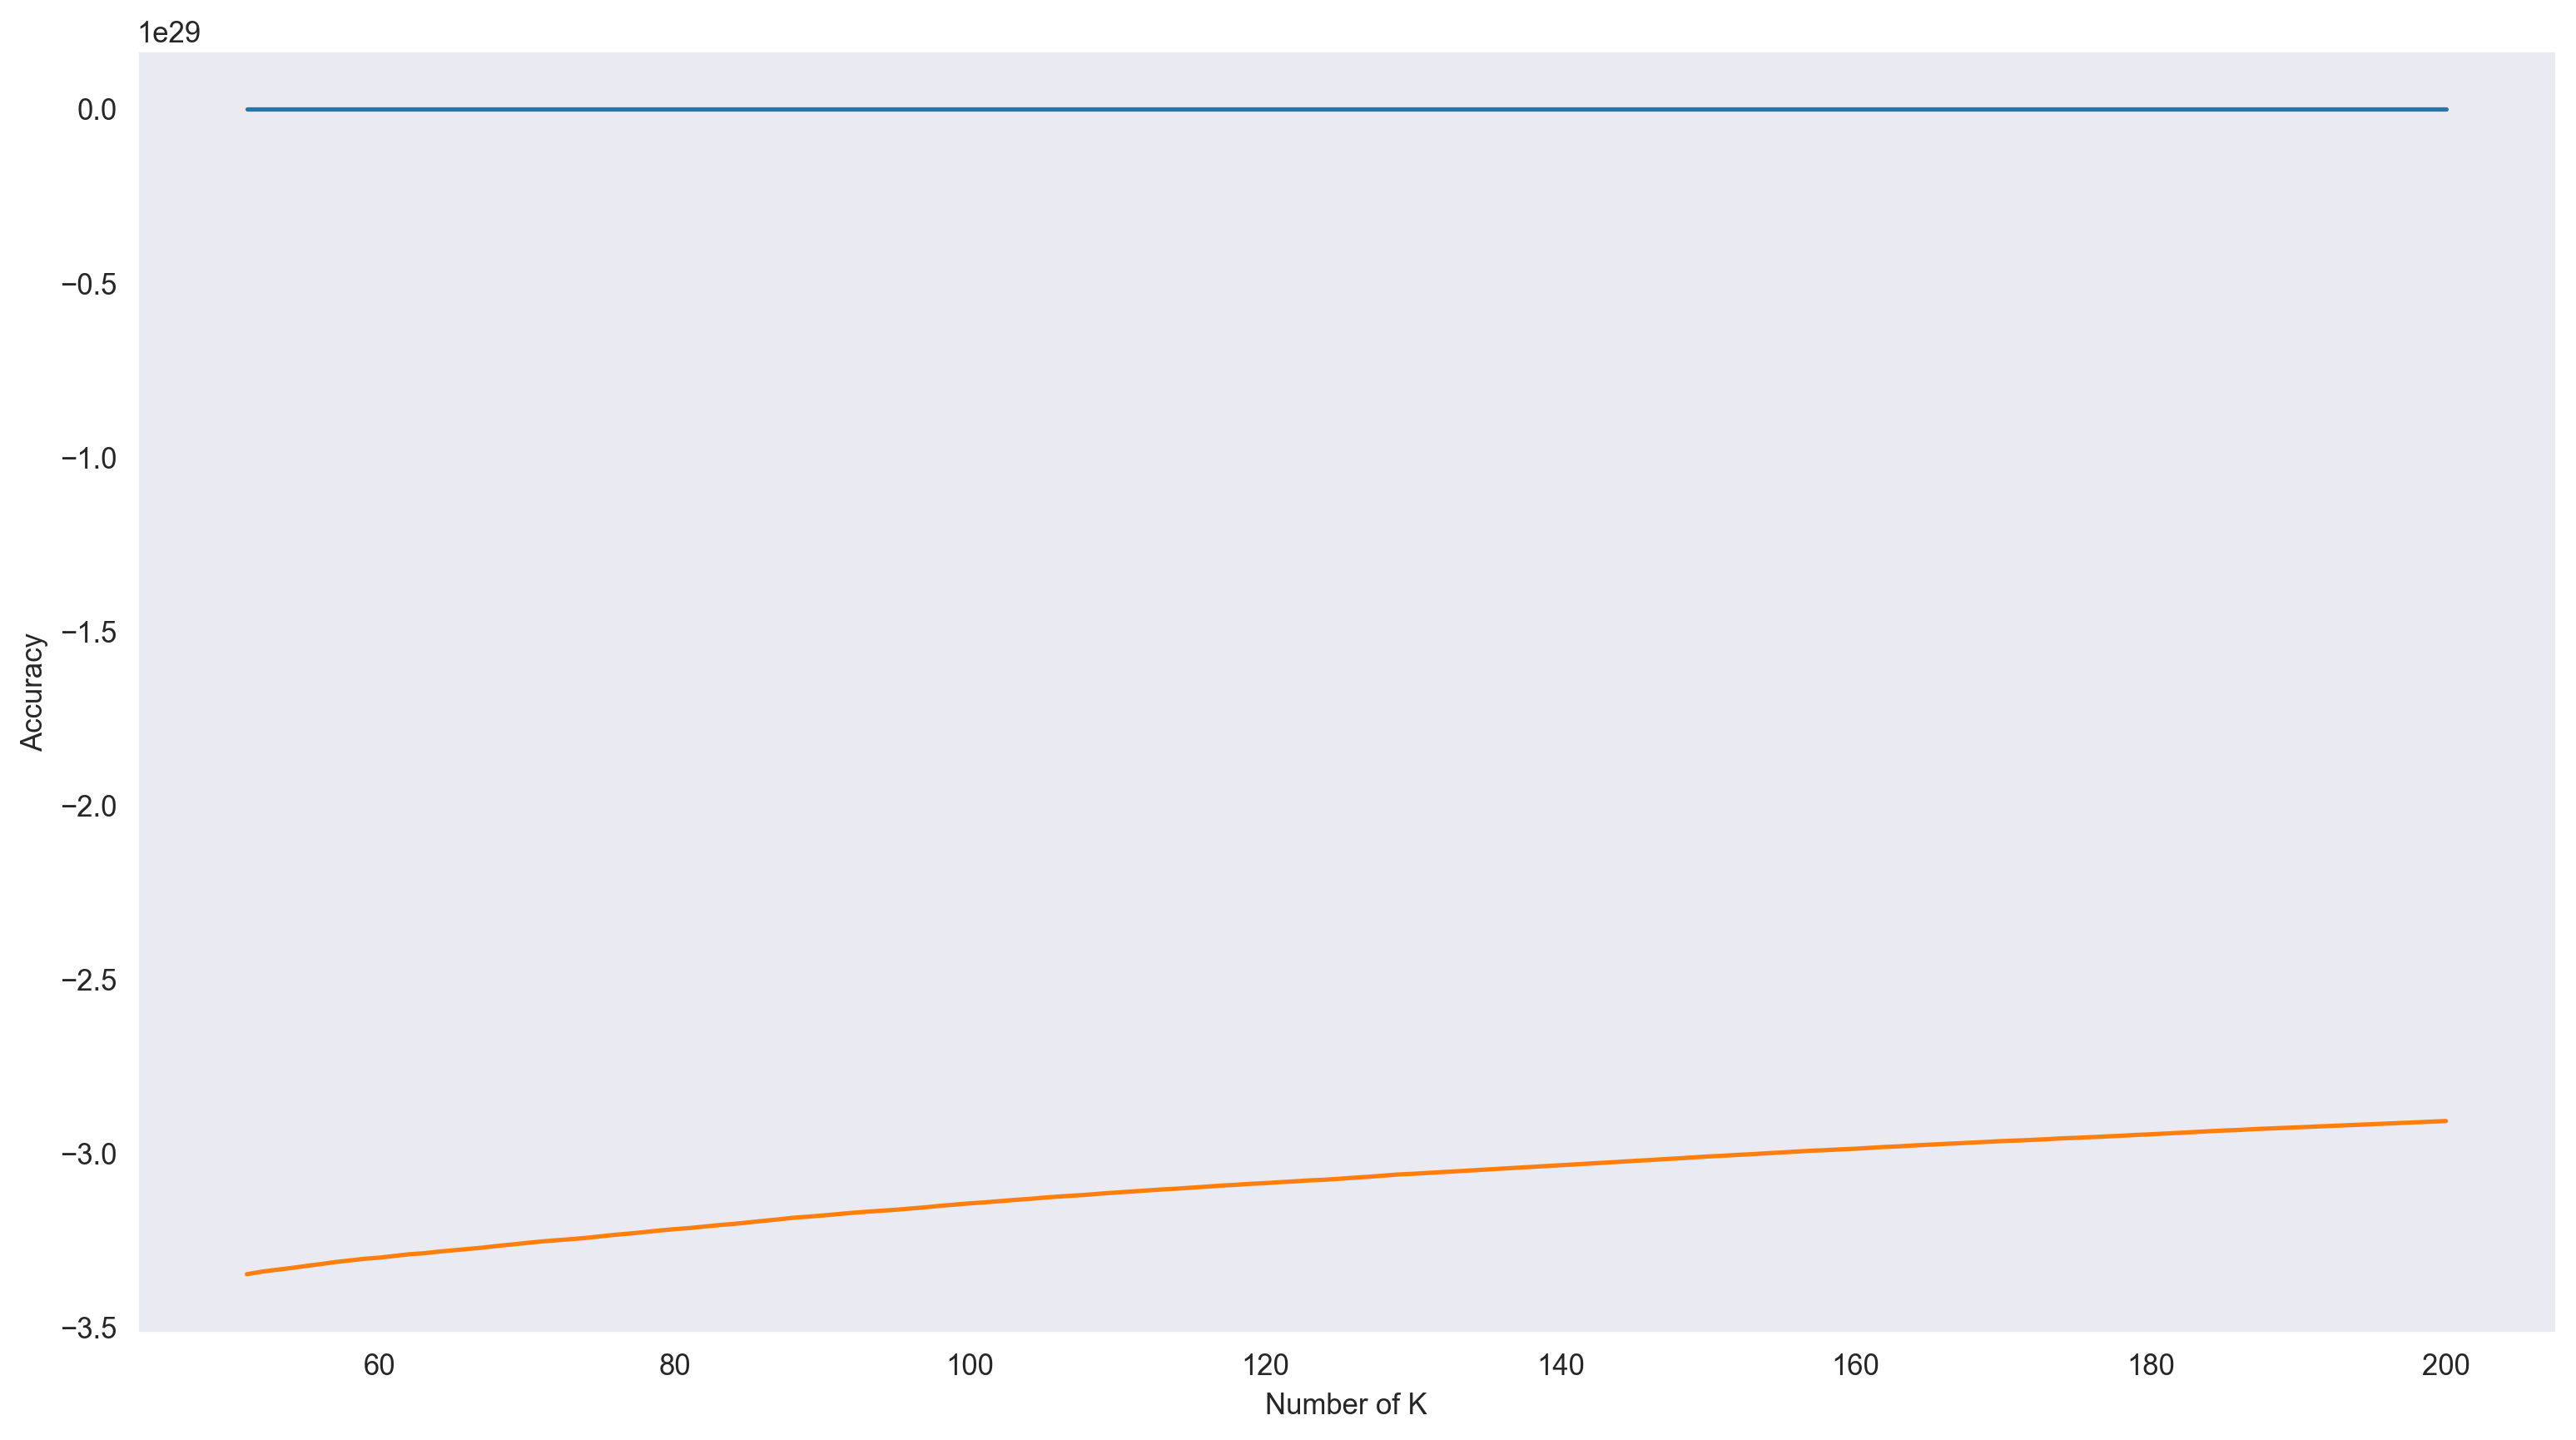

In [13]:
trainac = []
testac = []

for i in range(51,201):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)

    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

plt.title('')
plt.plot(range(51,201),trainac)
plt.plot(range(51,201), testac)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.grid()

#### Tuning Voting Classifier

#### Tuning Stacking Classifier

### Creating Final Model With Hyperparameter Value

#### Evaluating The Model

##### Creating Classification Report

##### Comparing Training And Testing Accuracy

## Creating Model